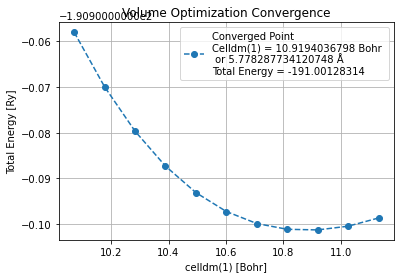

Value of celldm(1) at which the polynomial fit is minimum: 10.877158442418427
Converged lattice parameter is: 5.7559325630743166 Å


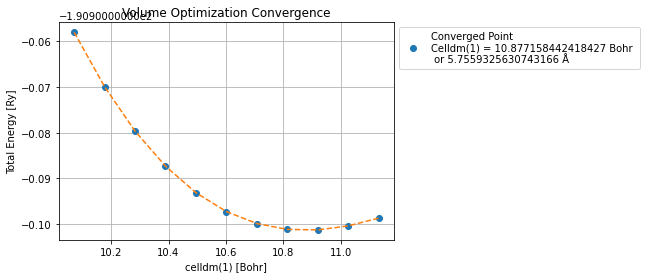

In [11]:
import numpy as np
import matplotlib.pyplot as plt 

def read_data(filename):
    """
    Reads data from the volume optimization data file.

    Parameters:
    filename (str): The name of the data file.

    Returns:
    tuple: A tuple containing lists of celldm(1) values and corresponding total energies.
    """
    celldm_values = []
    total_energies = []
    with open(filename, 'r') as file:
        next(file)  # Skip the header
        for line in file:
            data = line.split()
            celldm_values.append(float(data[0]))
            total_energies.append(float(data[1]))
    return celldm_values, total_energies

def plot_data(celldm_values, total_energies, convergence_point):
    """
    Plots the total energy as a function of celldm(1) and marks the convergence point.

    Parameters:
    celldm_values (list): List of celldm(1) values.
    total_energies (list): List of total energies.
    convergence_point (tuple): Tuple containing the celldm(1) value and total energy at convergence.
    """
    plt.plot(celldm_values, total_energies, 'o--')

    # Add custom legend entry for converged point
    legend_entry = f'Converged Point\nCelldm(1) = {convergence_point[0]} Bohr \n or {convergence_point[0]/1.88973} Å\nTotal Energy = {convergence_point[1]}'
    plt.legend([legend_entry], loc='upper right')

    plt.xlabel('celldm(1) [Bohr]')
    plt.ylabel('Total Energy [Ry]')
    plt.title('Volume Optimization Convergence')

    plt.grid(True)
    plt.savefig('volume_optimized.pdf')
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def fit_data(celldm_values, total_energies, convergence_point):
    """
    Plots the total energy as a function of celldm(1) and marks the convergence point.

    Parameters:
    celldm_values (list): List of celldm(1) values.
    total_energies (list): List of total energies.
    convergence_point (tuple): Tuple containing the celldm(1) value and total energy at convergence.
    """

    # Third order polynomial fit
    coeffs = np.polyfit(celldm_values, total_energies, 3)
    fit_values = np.polyval(coeffs, celldm_values)

    # Find the minimum of the polynomial
    a, b, c, d = coeffs
    critical_points = np.roots([3 * a, 2 * b, c])  # Compute roots of derivative
    real_critical_points = critical_points[np.isreal(critical_points)].real
    min_point = min(real_critical_points)

    print("Value of celldm(1) at which the polynomial fit is minimum:", min_point)
    print(f'Converged lattice parameter is: {min_point/1.88973} Å')
    
    plt.plot(celldm_values, total_energies, 'o')
    plt.plot(celldm_values, fit_values, '--', label='Fit')

    # Create strings for fitted parameters
    fitted_params_str = '\n'.join([f'$a_{i}$ = {coeffs[i]:.2f}' for i in range(len(coeffs))])

    # Add custom legend entry for fitted parameters
#     legend_entry = f'Fitted Parameters:\n{fitted_params_str}'
    legend_entry = f'Converged Point\nCelldm(1) = {min_point} Bohr \n or {min_point/1.88973} Å'
    plt.legend([legend_entry], loc='upper left', bbox_to_anchor=(1, 1))

    plt.xlabel('celldm(1) [Bohr]')
    plt.ylabel('Total Energy [Ry]')
    plt.title('Volume Optimization Convergence')

    plt.grid(True)
    plt.savefig('volume_optimized_fit.pdf', bbox_inches='tight')
    plt.show()



def find_convergence(celldm_values, total_energies):
    """
    Finds the convergence point in the total energy data.

    Parameters:
    celldm_values (list): List of celldm(1) values.
    total_energies (list): List of total energies.

    Returns:
    tuple: A tuple containing the celldm(1) value and total energy at convergence.
    """
    min_energy_index = np.argmin(total_energies)
    convergence_point = (celldm_values[min_energy_index], total_energies[min_energy_index])
    return convergence_point

# Read data from file
filename = 'volume_optimization_data.txt'
celldm_values, total_energies = read_data(filename)

# Find convergence point
convergence_point = find_convergence(celldm_values, total_energies)

# Plot data and convergence point
plot_data(celldm_values, total_energies, convergence_point)
fit_data(celldm_values, total_energies, convergence_point)
#print("Convergence point at celldm(1) =", convergence_point[0], "with Total Energy =", convergence_point[1])
#print(f'Converged lattice parameter is: {convergence_point[0]/1.88973} Å')
